# Statistics

##### Mean, median, mode

In [6]:
import statistics as stats

In [7]:
numbers_list = [1,1,2,4,10000]

In [8]:
# the middle number positionally is the median
# if the set is even-numbered, the mean of the two middle numbers is taken.
stats.median(numbers_list)

2

In [9]:
# the mean
stats.mean(numbers_list)

2001.6

In [10]:
# the mode is the value in the distribution with the most frequency
stats.mode(numbers_list)

1

##### Interquartile Range

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [12]:
mean = 0
standard_dev = 1

In [13]:
# numpy ndarrray made via np.arange() from -10 to 10 with .0001 spacing
# between values
range = np.arange(-10, 10, 0.01)
range

array([-10.  ,  -9.99,  -9.98, ...,   9.97,   9.98,   9.99])

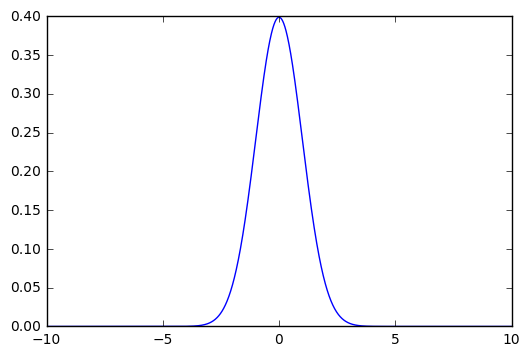

In [18]:
# plt.plot is the matplotlib plot function
# range sets the x-axis
# SciPy's norm.pdf() distribution values
my_plot = plt.plot(range, norm.pdf(range, mean, standard_dev))

In [15]:
# but what does the norm.pdf function return?
x = norm.pdf(range,mean,standard_dev)

In [19]:
# it's an ndarray
print(type(x))

<class 'numpy.ndarray'>


In [20]:
# with 1 dimension
x.ndim

1

I want to see the whole 1D ndarray. If it's acting as y-axis values, it should have a range from 0.0 to 0.4 given the graph ranges from 0.0 to 0.4.

In [21]:
# use np.savetxt() function to throw ndarray into csv
np.savetxt("x-ndarray.csv", x, delimiter=",")

Indeed, opening this file shows that values range from approximately 7.69 x 10^(-23) to 0.39.

Important note, the values in x are normally distributed via the norm.pdf function. So the values surrounding closer to the mean of 0.0 will be more numerous that those around the tail. Those more numerous values are closer to 0.39 than those in the tails.

I don't know why values only go to approximately 0.4

### Box Plots
Box plots take up less space and are therefore particularly useful for comparing distributions between several groups or sets of data. The whiskers show the spread of the data (the range of the data). Red line in the middle is the median. Half of the data is on one side and half is on the other. Either side of the box is the median for either half. There are four chunks such that they make up the four quartiles.

{'boxes': [<matplotlib.lines.Line2D at 0x10f3342e8>],
 'caps': [<matplotlib.lines.Line2D at 0x10f33ad68>,
 'fliers': [<matplotlib.lines.Line2D at 0x10f340f60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10f340748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10f334cf8>,
  <matplotlib.lines.Line2D at 0x10f334e80>]}

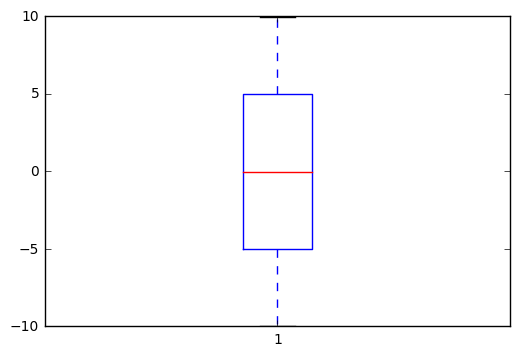

In [22]:
# my 'range' function is a 1D ndarray that has values at
# evenly spread intervals. So the median is right it the middle.
# and the ends of the box on either side are in the middle of
# the two halves.
import matplotlib.pyplot as plt
plt.boxplot(range)

In [23]:
# note in this distribution the median is 103
ndarray = np.array([1,2,4,5,100,101,102,103,105,106,107,108,109,110,111])
ndarray

array([  1,   2,   4,   5, 100, 101, 102, 103, 105, 106, 107, 108, 109,
       110, 111])

{'boxes': [<matplotlib.lines.Line2D at 0x10f39bc50>],
 'caps': [<matplotlib.lines.Line2D at 0x10f3a2fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x10f3aef98>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10f3ae0f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10f39bef0>,
  <matplotlib.lines.Line2D at 0x10f3a2eb8>]}

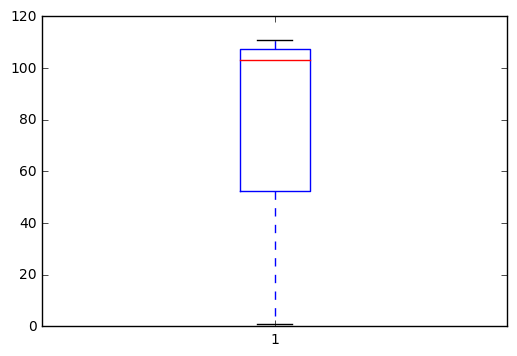

In [24]:
# 1st Quartile goes from the minimum to the bottom of the box.
# 2nd Quartile is bottom section of box, 3rd is top section,
# and 4th is from top of box to the top whisker.
# If Q3 and Q4 contain half of the data, it's clear their
# values are condensed near each other in those Quartiles.
# note, outliers may be plotted as a '+' somewhere outside
# of the box plot
plt.boxplot(ndarray)